In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

In [2]:
!pip install sklearn

In [591]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston =  load_boston()

In [592]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [593]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [594]:
import matplotlib.pyplot as plt
import seaborn as sns

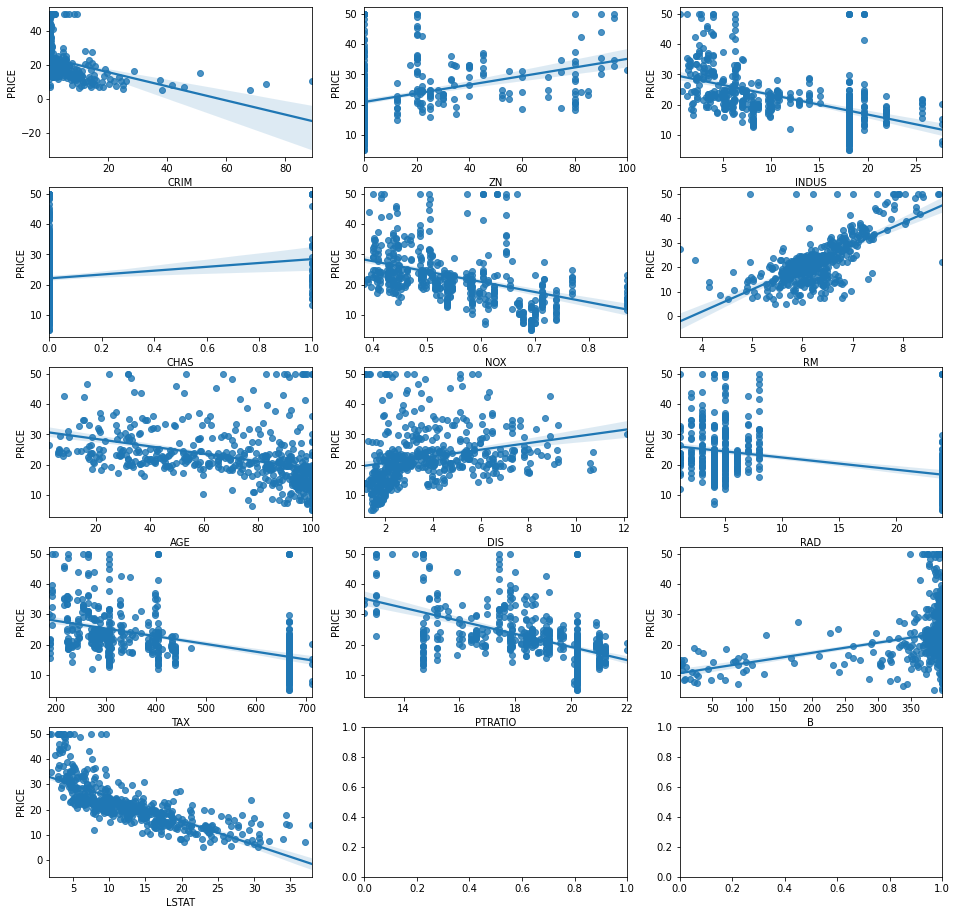

In [595]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [596]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. 변수 2개만(NOX, RM) 이용하여 예측하는 모델 만들기

In [597]:
Y = boston_df['PRICE']
X = boston_df[['RM', 'LSTAT']]
#RM, LSTAT : 0.690

In [598]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [599]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [600]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [601]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [602]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 22.113, RMSE : 4.702
R^2(Variance score) : 0.690


In [603]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  0.7117169081123471
회귀 계수 값:  [ 4.8 -0.6]


In [604]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

RM       4.84
LSTAT   -0.64
dtype: float64

# 2. 변수 13개를 이용하여 예측하는 모델 만들기

In [605]:
Y2 = boston_df['PRICE']
X2 = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [606]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=156)

In [607]:
# 선형회귀분석 : 모델 생성
lr2 = LinearRegression()

In [608]:
# 선형회귀분석 : 모델 훈련
lr2.fit(X_train2, Y_train2)

LinearRegression()

In [609]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict2 = lr2.predict(X_test2)

In [610]:
mse2 = mean_squared_error(Y_test2, Y_predict2)
rmse2 = np.sqrt(mse2)

print('MSE2 : {0:.3f}, RMSE2 : {1:.3f}'.format(mse2, rmse2))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test2, Y_predict2)))

MSE2 : 17.297, RMSE2 : 4.159
R^2(Variance score) : 0.757


In [611]:
print('Y 절편 값: ', lr2.intercept_)
print('회귀 계수 값: ', np.round(lr2.coef_, 1))

Y 절편 값:  40.995595172164336
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [612]:
coef2 = pd.Series(data = np.round(lr2.coef_, 2), index=X2.columns)
coef2.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

# ※ 위의 결과를 이용하여 분석

### (1) R2 기준으로 최고 정확도를 보여주는 모델을 PRICE = b0 + b1X1 + b2X2 형태로 제시하라
#### -> PRICE = 4.84RM - 0.64LSTAT + 0.71
### 
### (2) 2개 이용 예측모델과 13개를 이용 예측모델의 R2를 제시하라. 
#### -> 2개 이용 예측 모델의 R2값 = 0.69
#### -> 13개 이용 예측 모델의 R2값 = 0.757
### 